## 获得前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))

X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)  # np.mean(X, axis=0) 为 1 * n 矩阵

In [4]:
X = demean(X)

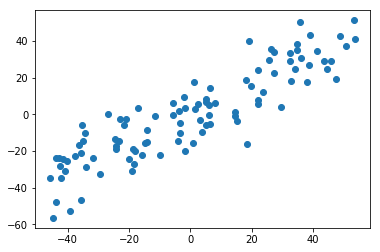

In [5]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [6]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)    # np.linalg.norm(w) 求w的模长

def first_component(X, ini_w, eta, n_iters=1e4, epsilon=1e-8):

    cur_iter = 0
    w = direction(ini_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)                                 # 注意1：每次求一个单位向量
            
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    
    return w

In [18]:
init_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, init_w, eta)
w

array([0.76893136, 0.63933134])

### 求第二主成分

In [8]:
X2 = np.empty(X.shape)

In [11]:
len(X)

100

In [12]:
X.shape[0]

100

In [13]:
X.shape[1]

2

In [14]:
# 去掉第一分量
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

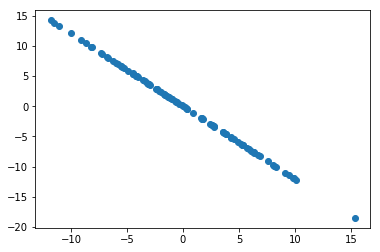

In [15]:
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

In [17]:
init_w = np.random.random(X.shape[1])
eta = 0.01
w2 = first_component(X2, init_w, eta)
w2

array([ 0.63933336, -0.76892969])

In [19]:
w.dot(w2)

2.6224174429767544e-06

#### 向量化求第二主成分

In [21]:
X2 = X - X.dot(w).reshape(-1, 1) * w
X2[:10]

array([[ 1.67622588, -2.01601669],
       [ 2.4492197 , -2.9457055 ],
       [ 0.29722047, -0.35747058],
       [-2.90995326,  3.49983521],
       [-4.91238634,  5.90818515],
       [-2.36223724,  2.84109067],
       [ 0.32659434, -0.39279888],
       [-1.95697204,  2.35367342],
       [ 0.91367472, -1.0988874 ],
       [-3.03707118,  3.65272142]])

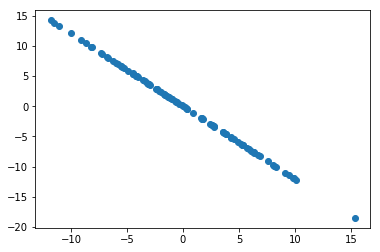

In [22]:
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

In [23]:
init_w = np.random.random(X.shape[1])
eta = 0.01
w2 = first_component(X2, init_w, eta)
w2

array([ 0.63933338, -0.76892967])

### 求前n个主分量

In [26]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    
    for i in range(n):
        init_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, init_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    
    return res

In [27]:
first_n_components(2, X )

[array([0.76893138, 0.63933132]), array([-0.63932936,  0.76893301])]